In [6]:
import sys
sys.path.append("/home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

# Import integration class
from pyACC.cosmology import *

# Import integration class
from pyACC.Calculus import integrate_f
import scipy as sp
from scipy import interpolate
from scipy.misc import derivative

In [7]:
# array of redshifts

n_inter=100
z_max=1
z_inter=np.linspace(0.0001,z_max,n_inter)

# Calculate the comoving distance at each redshift in z_list
comoving_t_inter = comoving_distance(z_inter)
comoving_i_lin = sp.interpolate.interp1d(z_inter,comoving_t_inter,kind='linear')
comoving_i_cub = sp.interpolate.interp1d(z_inter,comoving_t_inter,kind='cubic')

z_new = np.arange(0.0001, z_max, 0.001)
comoving_t=comoving_distance(z_new)
res_lin=np.abs(comoving_i_lin(z_new)-comoving_t)
res_cub=np.abs(comoving_i_cub(z_new)-comoving_t)

In [8]:
# cell for the derivative
CD_func=lambda x: comoving_distance(x)
der=np.zeros(z_new.size)
for idx,zi in enumerate(z_new):
    der[idx]=derivative(CD_func,zi.item(),dx=1e-6,n=2)
DER=np.absolute(der)*((z_max/n_inter)**2/8)

/tmp/ipykernel_22050/1578471946.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  der[idx]=derivative(CD_func,zi.item(),dx=1e-6,n=2)


Text(0, 0.5, 'residual')

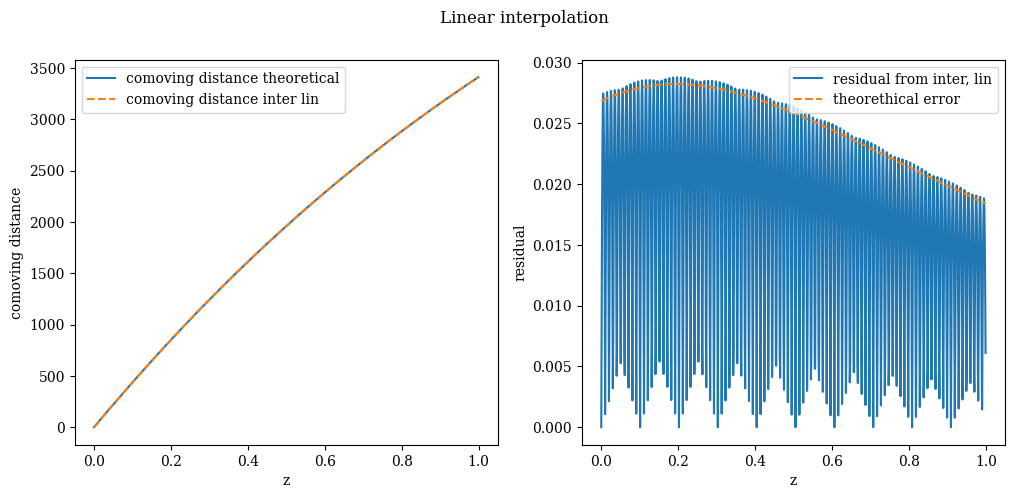

In [9]:

fig, ax = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Linear interpolation')
ax[0].plot(z_new,comoving_t,label='comoving distance theoretical')
ax[0].plot(z_new,comoving_i_lin(z_new),label='comoving distance inter lin',linestyle='--')
ax[0].set_xlabel('z')
ax[0].set_ylabel('comoving distance')
ax[0].legend()
ax[1].plot(z_new,res_lin,label='residual from inter, lin')
ax[1].plot(z_new,DER,label='theorethical error',linestyle='--')
ax[1].legend()
ax[1].set_xlabel('z')
ax[1].set_ylabel('residual')

Text(0, 0.5, 'residual')

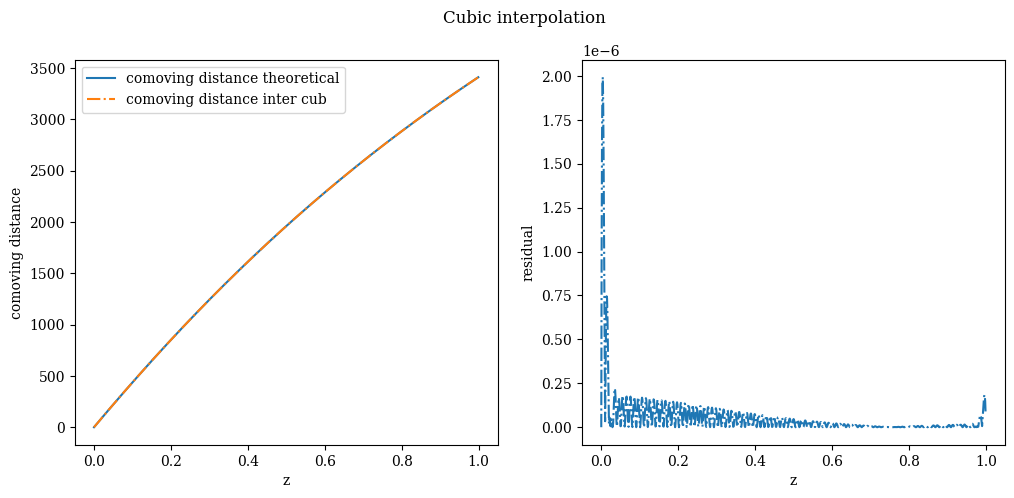

In [10]:
fig2, ax2 = plt.subplots(1,2,figsize=(12,5))
fig2.suptitle('Cubic interpolation')
ax2[0].plot(z_new,comoving_t,label='comoving distance theoretical')
ax2[0].plot(z_new,comoving_i_cub(z_new),label='comoving distance inter cub' ,linestyle='dashdot')
ax2[0].set_xlabel('z')
ax2[0].set_ylabel('comoving distance')
ax2[0].legend()
ax2[1].plot(z_new,res_cub,label='residual from inter, cub' ,linestyle='dashdot')
ax2[1].set_xlabel('z')
ax2[1].set_ylabel('residual')